In [2]:
import tensorflow_datasets as data
import numpy as np

imdb_data,info = data.load("imdb_reviews",with_info = True,as_supervised=True)

In [3]:
training_data,testing_data = imdb_data['train'], imdb_data['test']

train_sentences,train_labels,test_sentences,test_labels = [],[],[],[]

for sent,lab in training_data:
  train_sentences.append(sent.numpy().decode('utf8'))
  train_labels.append(lab.numpy())
train_labels_final = np.array(train_labels)

for sent,lab in testing_data:
  test_sentences.append(sent.numpy().decode('utf8'))
  test_labels.append(lab.numpy())
test_labels_final = np.array(test_labels)

In [4]:
vocab_size = 4000
embed_dim = 16
max_len = 500
truncation = 'post'
oov = '<OOV>'
epochs = 10

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov)
tokenizer.fit_on_texts(train_sentences)
words = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,maxlen=max_len,truncating=truncation)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_len,truncating=truncation)

In [6]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense


model = Sequential()
model.add(Embedding(vocab_size,embed_dim,input_length=max_len))
# GlobalAveragePooling1D 
model.add(Flatten())
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model_final = model.fit(train_padded,train_labels_final,epochs=epochs,validation_data=(test_padded,test_labels_final))

Epoch 1/10
782/782 [==============================] - 4s 6ms/step - loss: 0.4288 - accuracy: 0.7800 - val_loss: 0.2889 - val_accuracy: 0.8770
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2120 - accuracy: 0.9170 - val_loss: 0.2980 - val_accuracy: 0.8740
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.1182 - accuracy: 0.9610 - val_loss: 0.3590 - val_accuracy: 0.8619
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0478 - accuracy: 0.9894 - val_loss: 0.4350 - val_accuracy: 0.8598
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0156 - accuracy: 0.9979 - val_loss: 0.5152 - val_accuracy: 0.8571
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.5814 - val_accuracy: 0.8575
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.6378 - val_accuracy: 0.8564
Epoch 

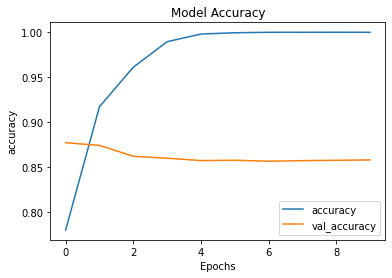

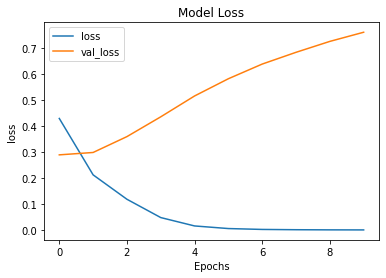

In [8]:
import matplotlib.pyplot as plt

plt.plot(model_final.history['accuracy'])
plt.plot(model_final.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'])
plt.title('Model Accuracy')
plt.show()

plt.plot(model_final.history['loss'])
plt.plot(model_final.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.title('Model Loss')
plt.show()